# Exploratory Data Analysis

Lipinski descriptors: rule of thumb for evaluating the druglike-ness of compounds based on Adsorption, Distribution, Metabolism, and Excretion (ADME) known as the pharmacokinetic profile. Lipinski's "Rule of 5" was introduced to estimate the oral bioavailability of molecules. Poor absorption is likely if the molecule violates more than one of the following conditions: 

- Molecular Weight < 500 Dalton 
- Octanol-water partition coefficient (logP) <= 5
- Hydrogen bond donors <= 5
- Hydrogen bond acceptors <= 10 

In [3]:
import numpy as np
import pandas as pd
import csv 

! pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [46]:
# define df from CSV file 
df = pd.read_csv("bioactivity_preprocessed_data.csv")

df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive


### Playing around with `rdkit`

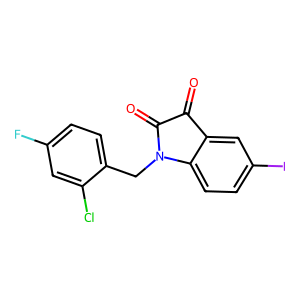

In [47]:
# Testing drawing function 
from rdkit.Chem import Draw
m = Chem.MolFromSmiles(df.canonical_smiles[1])
img = Draw.MolToImage(m)

img

In [48]:
# Testing calculation of Lipinski descriptors

# Ro5 Descriptors 
MW = Descriptors.MolWt(m)
HBA = Descriptors.NumHAcceptors(m)
HBD = Descriptors.NumHDonors(m)
LogP = Descriptors.MolLogP(m)

conditions = [MW <= 500, HBA <= 5, HBD <=5, LogP <=10]

pass_ro5 = conditions.count(True) >= 3

print(pass_ro5)

True


## Calculating Lipinski Descriptors

In [49]:
lipinski_desc = []

for i in df["canonical_smiles"]:
    j = Chem.MolFromSmiles(i)
    MW = Descriptors.MolWt(j)
    HBA = Descriptors.NumHAcceptors(j)
    HBD = Descriptors.NumHDonors(j)
    LogP = Descriptors.MolLogP(j)

    conditions = [MW < 500, HBA <= 5, HBD <= 5, LogP <= 10]

    if conditions.count(True) >= 3:
        lipinski_desc.append(True)
    else:
        lipinski_desc.append(False)

df["lipinski_desc"] = lipinski_desc
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,lipinski_desc
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,True
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,True
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,True
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,True
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,True
...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive,True
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive,True
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive,True
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive,True
